In [1]:
import cv2, os, glob
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint
from skimage.transform import pyramid_expand
from Subpixel import Subpixel
from DataGenerator import DataGenerator
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import model_to_dot
from IPython.display import Image

Using TensorFlow backend.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from keras.layers import *
from keras.regularizers import *
from keras.optimizers import *
from keras.models import *
from keras import backend as K
from keras.preprocessing import image

In [3]:
tf.keras.__version__

'2.2.4-tf'

# Fine Tuning을 위한 데이터 전처리 작업 npy 파일로 만드는 과정임

In [24]:
image_list = glob.glob("50\\*.jpg")
len(image_list)

1995

In [25]:
from PIL import Image
def resize(path):
    image = Image.open(path)
    resized_image = cv2.resize(np.array(image),dsize = (128,128) ,interpolation = cv2.INTER_AREA )
    resized_image  = resized_image.astype('float64')/255.
    return resized_image

In [26]:
img_1 = 128
img_2 = 128
img_3 = 3

print(len(image_list))

train =np.zeros((len(image_list),img_1,img_2,img_3))

for i,j in enumerate(image_list):
    train[i,:,:,:] = resize(j)

1995


In [28]:
train.shape

(1995, 128, 128, 3)

In [22]:
# for i,j in enumerate(train):
#     img = image.array_to_img(j)
#     img.save('50\\'+str(i)+'.jpg')

In [27]:
a = 0
for i in train:
    경로 = 'C:\\Users\\hyoun\\딥러닝\\화질개선데이터\\x_train1\\' + str(a) + '.npy'
    np.save(경로,i)
    a += 1

# 여기부터 실행

In [3]:
x_test_list = sorted(glob.glob("vae얼굴사진\\*.npy"))
len(x_test_list)

225

In [4]:
test_data = []
for i in x_test_list:
    test_data.append(np.load(i))
len(test_data)

225

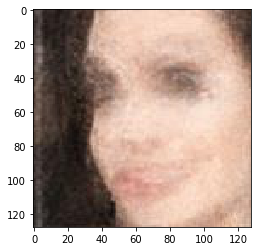

In [5]:
plt.imshow(test_data[197])

In [32]:
x_train_list = sorted(glob.glob("화질개선데이터\\x_train1\\*.npy"))
y_train_list = sorted(glob.glob("화질개선데이터\\y_train1\\*.npy"))
train_gen = DataGenerator(list_IDs=x_train_list, labels=None, batch_size=8, dim=(128,128), n_channels=3, n_classes=None, shuffle=True)
ytrain_gen = DataGenerator(list_IDs=y_train_list, labels=None, batch_size=8, dim=(128,128), n_channels=3, n_classes=None, shuffle=True)
print(len(x_train_list))
print(x_train_list[0])

1995
화질개선데이터\x_train1\0.npy


(128, 128, 3) (128, 128, 3)


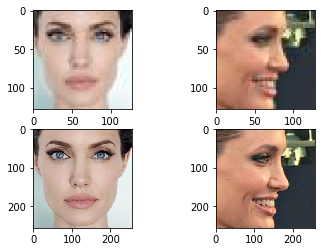

In [33]:
x1 = np.load(x_train_list[0])
x2 = np.load(x_train_list[1])
x3 = np.load(y_train_list[0])
x4 = np.load(y_train_list[1])
print(x1.shape, x2.shape)

plt.subplot(2, 2, 1)
plt.imshow(x1)
plt.subplot(2, 2, 2)
plt.imshow(x2)
plt.subplot(2, 2, 3)
plt.imshow(x3)
plt.subplot(2, 2, 4)
plt.imshow(x4)

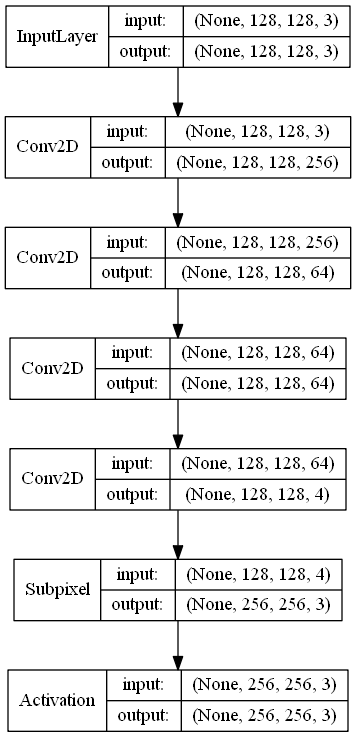

In [3]:
upscale_factor = 2

inputs = Input(shape=(128,128,3),dtype='float32')

net = Conv2D(filters=256, kernel_size=5, strides=1, padding='same', activation='relu')(inputs)
net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Conv2D(filters=upscale_factor**2, kernel_size=3, strides=1, padding='same', activation='relu')(net)
net = Subpixel(filters=3, kernel_size=3, r=upscale_factor, padding='same')(net)
outputs = Activation('relu')(net)

model = Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=RMSprop(lr = 0.0005), loss='mse')

Image(model_to_dot(model,show_shapes=True, show_layer_names=False).create(prog='dot', format='png'))

In [37]:
a = 1
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 44s 175ms/step - loss: 0.0536


(1, 256, 256, 3)


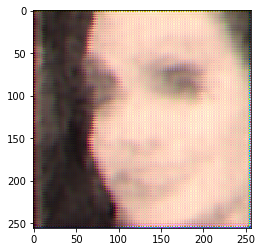

In [38]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [39]:
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 42s 167ms/step - loss: 0.0121


(1, 256, 256, 3)


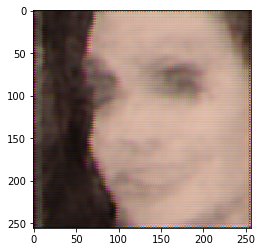

In [41]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [42]:
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 43s 172ms/step - loss: 0.0088


(1, 256, 256, 3)


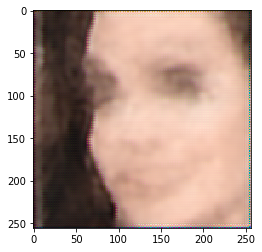

In [43]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [44]:
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 1

Epoch 1/1
249/249 [==============================] - 44s 176ms/step - loss: 0.0068


(1, 256, 256, 3)


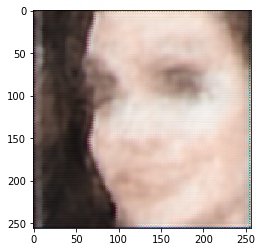

In [45]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [46]:
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=1)
model.save(name)
a += 5

Epoch 1/1
249/249 [==============================] - 45s 179ms/step - loss: 0.0059


(1, 256, 256, 3)


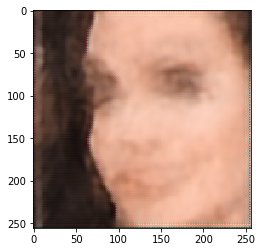

In [47]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [48]:
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=5)
model.save(name)
a += 10

Epoch 1/5
249/249 [==============================] - 43s 174ms/step - loss: 0.0053
Epoch 2/5
249/249 [==============================] - 45s 182ms/step - loss: 0.0049
Epoch 3/5
249/249 [==============================] - 46s 184ms/step - loss: 0.0044
Epoch 4/5
249/249 [==============================] - 46s 184ms/step - loss: 0.0043
Epoch 5/5
249/249 [==============================] - 46s 185ms/step - loss: 0.0040


(1, 256, 256, 3)


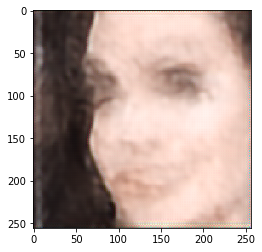

In [49]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [50]:
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=10)
model.save(name)
a += 10

Epoch 1/10
249/249 [==============================] - 45s 181ms/step - loss: 0.0039
Epoch 2/10
249/249 [==============================] - 46s 185ms/step - loss: 0.0037
Epoch 3/10
249/249 [==============================] - 46s 186ms/step - loss: 0.0035
Epoch 4/10
249/249 [==============================] - 46s 186ms/step - loss: 0.0034
Epoch 5/10
249/249 [==============================] - 47s 187ms/step - loss: 0.00332s 
Epoch 6/10
249/249 [==============================] - 47s 189ms/step - loss: 0.0032
Epoch 7/10
249/249 [==============================] - 47s 188ms/step - loss: 0.0031
Epoch 8/10
249/249 [==============================] - 47s 189ms/step - loss: 0.0030
Epoch 9/10
249/249 [==============================] - 47s 187ms/step - loss: 0.0030
Epoch 10/10
249/249 [==============================] - 47s 187ms/step - loss: 0.0029


(1, 256, 256, 3)


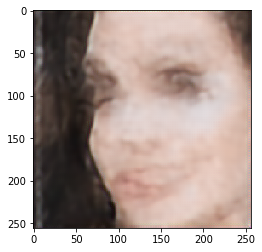

In [51]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [52]:
name = str(a) + '번.h5'
history = model.fit_generator(train_gen, epochs=10)
model.save(name)
a += 10

Epoch 1/10
249/249 [==============================] - 46s 184ms/step - loss: 0.0029
Epoch 2/10
249/249 [==============================] - 46s 183ms/step - loss: 0.0028
Epoch 3/10
249/249 [==============================] - 46s 187ms/step - loss: 0.0028
Epoch 4/10
249/249 [==============================] - 46s 186ms/step - loss: 0.0027
Epoch 5/10
249/249 [==============================] - 47s 187ms/step - loss: 0.0027
Epoch 6/10
249/249 [==============================] - 47s 187ms/step - loss: 0.0027
Epoch 7/10
249/249 [==============================] - 47s 187ms/step - loss: 0.0027
Epoch 8/10
249/249 [==============================] - 47s 187ms/step - loss: 0.0027
Epoch 9/10
249/249 [==============================] - 47s 188ms/step - loss: 0.0026
Epoch 10/10
249/249 [==============================] - 47s 187ms/step - loss: 0.0026


(1, 256, 256, 3)


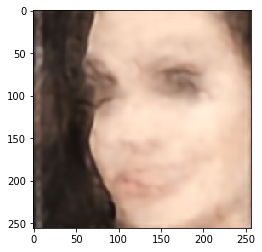

In [53]:
y_pred = model.predict(test_data[197].reshape(1,128,128,3))

print(y_pred.shape)
y_pred = np.clip(y_pred.reshape(256,256,3),0,1)
#y_pred = cv2.cvtColor(y_pred,cv2.COLOR_BGR2RGB)
plt.imshow(y_pred)

In [8]:
model.load_weights('30번.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


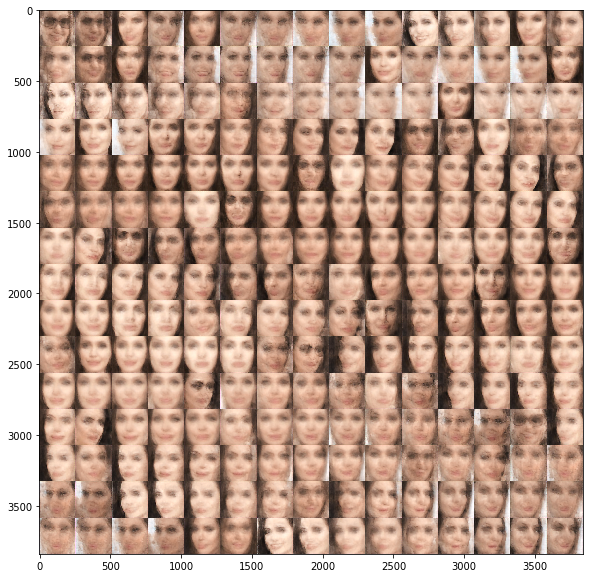

In [9]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 256
figure = np.zeros((digit_size * n, digit_size * n,3))

for i in range(n):
    for j in range(n):
        num = 15*i + j 
        dat = test_data[num]
        x_decoded = model.predict(dat.reshape(1,128,128,3))
        digit = x_decoded[0].reshape(digit_size, digit_size,3)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()